# Init

In [1]:
import sys

# This allows you to run on Colaboratory and load files from your Google Drive
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/My Drive/'
except:
    main_path = ''
sys.path.append(main_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install mplhep
import mplhep as hep
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [3]:
!pip install uproot3
!pip install hist

import uproot3
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import hist

     |████████████████████████████████| 117 kB 5.1 MB/s 
     |████████████████████████████████| 87 kB 6.1 MB/s 
     |████████████████████████████████| 1.4 MB 8.2 MB/s 


In [4]:
def default_flatname(branchname, fieldname, index):
    """This replaces the dot in the column names with underscores"""
    out = branchname.replace(".", "_")
    if not isinstance(branchname, str):
        out = branchname.decode("utf-8")
    if fieldname is not None:
        fieldname.replace(".", "_")
        out += "_" + fieldname
    if index != ():
        out += "[" + "][".join(str(x) for x in index) + "]"
    return out

# Load data

In [5]:
f3feet = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_more_stat.root")
f6feet = uproot3.open("drive/MyDrive/root_files_dzhadan/double_s_geom_more_stat3.root")
f5pct219 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_less.root")
f5pct242 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_more.root")
f5pct231 = uproot3.open("drive/MyDrive/root_files_dzhadan/ord_geom_231.root")

In [6]:
df3feet = f3feet["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df6feet = f6feet["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pct219 = f5pct219["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pct242 = f5pct242["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)
df5pct231 = f5pct231["HitDumper/nt"].pandas.df(['hits'], flatname=default_flatname, flatten=True)

In [7]:
all_cats = ["3f", "6f", "5pct219", "5pct242","5pct231"]

In [8]:
h = hist.Hist(
    hist.axis.StrCategory(all_cats, name="cat"),
    hist.axis.Regular(30, 0, 3000, name="x"),
    hist.storage.Weight(),
)

In [9]:
h.fill(cat="3f", x=df3feet.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy())
h.fill(cat="6f", x=df6feet.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy());
h.fill(cat="5pct219", x=df5pct219.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy());
h.fill(cat="5pct242", x=df5pct242.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy());
h.fill(cat="5pct231", x=df5pct231.query("hits_ek > 250 & hits_pdgId == 2112")["hits_ek"].to_numpy());

# Draw Ratio plots

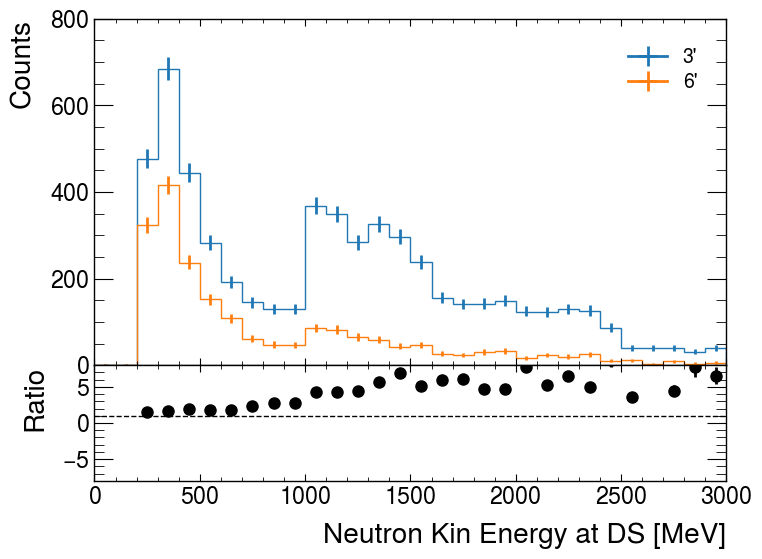

In [10]:
fig = plt.figure()
h["3f", :].plot_ratio(h["6f", :], rp_num_label="3'", rp_denom_label="6'", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line');
fig.get_axes()[1].set_ylim(-8,8) #ratio
fig.get_axes()[1].set_xlabel('Neutron Kin Energy at DS [MeV]');

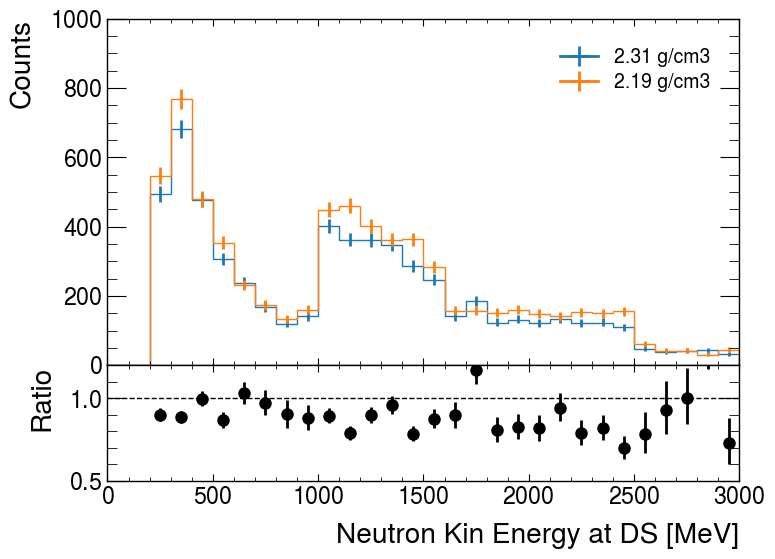

In [11]:
fig = plt.figure()
h["5pct231", :].plot_ratio(h["5pct219", :], rp_num_label="2.31 g/cm3", rp_denom_label="2.19 g/cm3", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line');
fig.get_axes()[1].set_ylim(0.5,1.2) #ratio
fig.get_axes()[1].set_xlabel('Neutron Kin Energy at DS [MeV]');

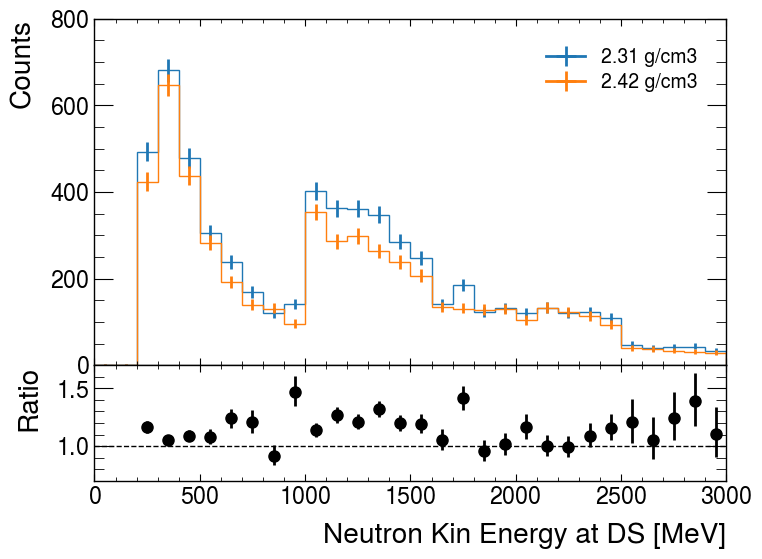

In [12]:
fig = plt.figure()
h["5pct231", :].plot_ratio(h["5pct242", :], rp_num_label="2.31 g/cm3", rp_denom_label="2.42 g/cm3", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line')
fig.get_axes()[1].set_ylim(0.7,1.7) #ratio
fig.get_axes()[1].set_xlabel('Neutron Kin Energy at DS [MeV]');

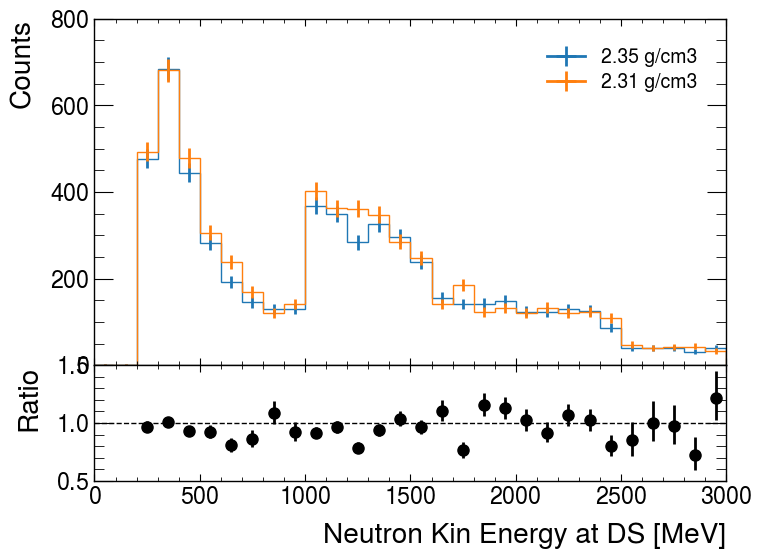

In [13]:
fig = plt.figure()
h["3f", :].plot_ratio(h["5pct231", :], rp_num_label="2.35 g/cm3", rp_denom_label="2.31 g/cm3", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line');
fig.get_axes()[1].set_ylim(0.5,1.5) #ratio
fig.get_axes()[1].set_xlabel('Neutron Kin Energy at DS [MeV]');

# Errors estimate

In [18]:
a219 = h["5pct219",:].counts()[2:]
a231 = h["5pct231",:].counts()[2:]
a235 = h["3f",:].counts()[2:]
a242 = h["5pct242",:].counts()[2:]
f_231_242 = a231/a242
errs = f_231_242 * np.sqrt( (np.sqrt(a231)/a231)*(np.sqrt(a231)/a231) + (np.sqrt(a242)/a242)*(np.sqrt(a242)/a242) )

In [ ]:
errs_from_bar = np.array([])
for i in h["5pct231", :].plot_ratio(h["5pct242", :], rp_num_label="2.31 g/cm3", rp_denom_label="2.42 g/cm3", rp_ratio_ylim=[0,1], rp_uncert_draw_type='line')[1][1][2][0].get_segments()[2:]:
    errs_from_bar = np.append(errs_from_bar, (i[1][1] - i[0][1])/2)

In [ ]:
!pip install uncertainties 
from uncertainties import ufloat

In [21]:
a219_un = np.array([ ufloat(x, np.sqrt(x)) for x in h["5pct219",:].counts()[2:]])
a231_un = np.array([ufloat(x, np.sqrt(x)) for x in h["5pct231",:].counts()[2:]])
a235_un = np.array([ufloat(x, np.sqrt(x)) for x in h["3f",:].counts()[2:]])
a242_un = np.array([ufloat(x, np.sqrt(x)) for x in h["5pct242",:].counts()[2:]])
f_231_242_un = a231_un/a242_un
errs_un = []
for i in f_231_242_un:
    errs_un.append(i.std_dev)
errs_un = np.array(errs_un)

In [25]:
print("Wiki:\n ", errs)
print("Uncertainties module:\n ", errs_un)
print("Ratio plot error bar:\n ", errs_from_bar)

Wiki:
  [0.07701217 0.05789756 0.07218559 0.08917409 0.12024606 0.13858034
 0.11574988 0.19434657 0.08306622 0.10013658 0.09481388 0.10786885
 0.10514965 0.11244001 0.12694591 0.16125844 0.12133175 0.125465
 0.1555729  0.12262787 0.1272495  0.14183744 0.16321854 0.2610365
 0.24190036 0.2905607  0.32681919 0.28290649]
Uncertainties module:
  [0.07701217 0.05789756 0.07218559 0.08917409 0.12024606 0.13858034
 0.11574988 0.19434657 0.08306622 0.10013658 0.09481388 0.10786885
 0.10514965 0.11244001 0.12694591 0.16125844 0.12133175 0.125465
 0.1555729  0.12262787 0.1272495  0.14183744 0.16321854 0.2610365
 0.24190036 0.2905607  0.32681919 0.28290649]
Ratio plot error bar:
  [0.05355508 0.04117518 0.05106626 0.06359581 0.08298252 0.09689136
 0.08749648 0.12897234 0.05822689 0.06828907 0.06545095 0.07274679
 0.07305409 0.07836488 0.0923981  0.10769151 0.09060962 0.09227971
 0.11064958 0.0905246  0.09432423 0.10263745 0.11647092 0.18891617
 0.18265506 0.20957701 0.22806633 0.21280843]
